In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
readPanda= pd.read_csv("unsupervised.csv")
display(readPanda)

,Protocol,Length,dates,Source,Destination,source port,Destination port,Count
0,TLSv1.2,97,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,1440
1,TLSv1.2,96,2020-03-10,89.18.105.60,130.240.134.20,8883,34223,1440
2,TLSv1.2,162,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,8
3,TLSv1.2,164,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,8
4,TLSv1.2,166,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,9
...,...,...,...,...,...,...,...,...
449,TLSv1.2,206,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,5
450,TLSv1.2,239,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,7
451,TLSv1.2,240,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,41
452,TLSv1.2,971,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,3


In [3]:

readPanda['day'] = pd.to_datetime(readPanda['dates'] ,errors = 'coerce',format = '%Y-%m-%d').dt.strftime("%d")

In [4]:
readPanda

,Protocol,Length,dates,Source,Destination,source port,Destination port,Count,day
0,TLSv1.2,97,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,1440,10
1,TLSv1.2,96,2020-03-10,89.18.105.60,130.240.134.20,8883,34223,1440,10
2,TLSv1.2,162,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,8,10
3,TLSv1.2,164,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,8,10
4,TLSv1.2,166,2020-03-10,130.240.134.20,89.18.105.60,34223,8883,9,10
...,...,...,...,...,...,...,...,...,...
449,TLSv1.2,206,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,5,31
450,TLSv1.2,239,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,7,31
451,TLSv1.2,240,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,41,31
452,TLSv1.2,971,2020-05-31,130.240.134.20,89.18.105.60,36655,8883,3,31


In [5]:
sumation = readPanda.groupby(['dates']).sum().reset_index()

In [6]:
sumation.columns.values[4] = "daywise_packetlength_sum"

In [7]:
sumation

,dates,Length,source port,Destination port,daywise_packetlength_sum
0,2020-03-10,7319,830235,247415,18774
1,2020-03-11,10063,1121785,386925,14991
2,2020-03-12,9847,1104019,318479,15749
3,2020-03-13,8861,1001350,291830,16153
4,2020-03-14,5159,488005,158585,18682
5,2020-03-15,4947,453782,149702,18678
6,2020-03-16,8518,932904,274064,15228
7,2020-04-25,6131,1107292,226588,3364
8,2020-04-26,5156,1049481,217705,3363
9,2020-05-28,11602,1299568,521952,29029


In [8]:
summation_df=pd.merge(readPanda, sumation, on='dates')

In [9]:
summation_df.to_csv('ad.csv')

In [10]:
summation_df1=summation_df[['Length_x','Source', 'Destination', 'dates', 'source port_x', 'Destination port_x', 'Count', 'day', 'daywise_packetlength_sum']]

<AxesSubplot:>

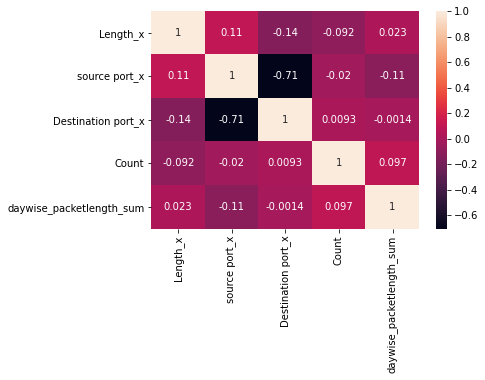

In [11]:
sns.heatmap(summation_df1.corr(), annot= True)

In [12]:
HashF= summation_df1[[ 'source port_x', 'Destination port_x']]
haship=summation_df1[[ 'Source', 'Destination']]
Hashn= summation_df1[[ 'source port_x', 'Destination port_x','Source', 'Destination']]

In [13]:
summation_df1['hashvalueport']= HashF.apply(lambda x: hash(tuple(x)), axis = 1)


/home/adi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
summation_df1

,Length_x,Source,Destination,dates,source port_x,Destination port_x,Count,day,daywise_packetlength_sum,hashvalueport
0,97,130.240.134.20,89.18.105.60,2020-03-10,34223,8883,1440,10,18774,3747824302019646681
1,96,89.18.105.60,130.240.134.20,2020-03-10,8883,34223,1440,10,18774,3721484179454436881
2,162,130.240.134.20,89.18.105.60,2020-03-10,34223,8883,8,10,18774,3747824302019646681
3,164,130.240.134.20,89.18.105.60,2020-03-10,34223,8883,8,10,18774,3747824302019646681
4,166,130.240.134.20,89.18.105.60,2020-03-10,34223,8883,9,10,18774,3747824302019646681
...,...,...,...,...,...,...,...,...,...,...
449,206,130.240.134.20,89.18.105.60,2020-05-31,36655,8883,5,31,33222,3749348501515105881
450,239,130.240.134.20,89.18.105.60,2020-05-31,36655,8883,7,31,33222,3749348501515105881
451,240,130.240.134.20,89.18.105.60,2020-05-31,36655,8883,41,31,33222,3749348501515105881
452,971,130.240.134.20,89.18.105.60,2020-05-31,36655,8883,3,31,33222,3749348501515105881


In [15]:
summation_df1['hashvalueip']= haship.apply(lambda x: hash(tuple(x)), axis = 1)


/home/adi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
summation_df1['hashvaluecombineipandport']= Hashn.apply(lambda x: hash(tuple(x)), axis = 1)


/home/adi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
summation_df2= summation_df1.sort_values('day', ascending=True)

In [18]:
summation_df2.to_csv('results.csv')

In [19]:
data4=summation_df2[['Length_x','Count','daywise_packetlength_sum', 'hashvalueip']]
#data4=readPanda[['Length','Count', 'hashvalueip', 'hashvalueport']]
#data5=summation_df2[['Length_x','daywise_packetlength_sum']]

In [35]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
outlier_fraction = 0.1


#RANDOM_STATE = 150
#Build the ensemble model

clf = IsolationForest(contamination=outlier_fraction, n_jobs=-1,max_features=4, random_state=100)
#clf=IsolationForest(random_state=, contamination='auto', behaviour='new')
summation_df2["anomaly"] = clf.fit_predict(data4)


In [36]:
summation_df2['anomaly'].value_counts()

 1    408
-1     46
Name: anomaly, dtype: int64

In [37]:
a = summation_df2[summation_df2["anomaly"]==-1]
na = summation_df2[summation_df2["anomaly"]==1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


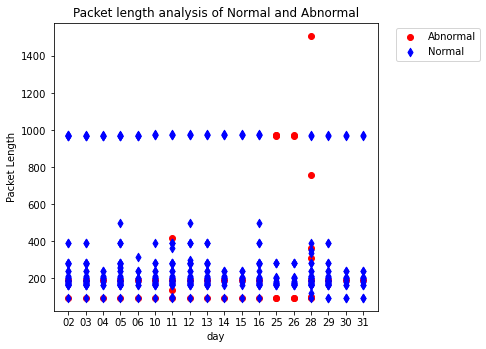

In [38]:

fig=plt.figure(figsize=(4.5,4))
ax=fig.add_axes([0,0,1,1])
ax.scatter(a["day"], a["Length_x"], label="Abnormal", marker='o', color='r')
ax.scatter(na["day"], na['Length_x'],label="Normal", marker='d', color='b')
ax.set_xlabel('day')
ax.set_ylabel('Packet Length')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.gca().legend(('Abnormal','Normal'))
#plt.legend()
ax.set_title('Packet length analysis of Normal and Abnormal')
#fig.rcParams["figure.figsize"] = (20,3)
ax.figure.savefig('destination_path2.eps', format='eps')






In [32]:
summation_df2.to_csv('result.csv')

In [41]:
from sklearn import metrics



print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data4, summation_df2['anomaly']))

Silhouette Coefficient: 0.846


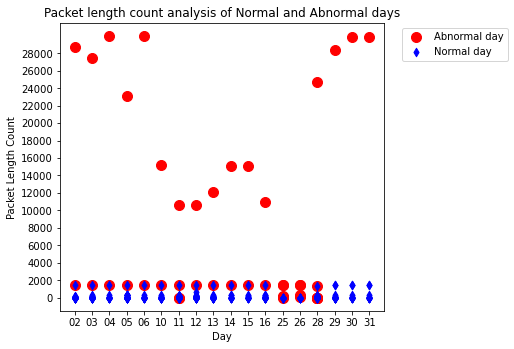

In [42]:
fig=plt.figure(figsize=(4.5,4))
ax=fig.add_axes([0,0,1,1])
ax.scatter(a["day"], a["Count"], label="Abnormal day",s=100,  marker='o', color='r')
ax.scatter(na["day"], na['Count'],label="Normal day", marker='d', color='b')
ax.set_xlabel('Day')
ax.set_ylabel('Packet Length Count')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.gca().legend(('Abnormal','Normal'))
#plt.legend()
plt.yticks(np.arange(0, 30000, 2000))
ax.set_title('Packet length count analysis of Normal and Abnormal days')
#fig.rcParams["figure.figsize"] = (20,3)
#fig.savefig('destination_path2.eps', format='eps')
fig.savefig('image.jpg')